#Homework

1.How to check GPU status?

2.What is the synonyms of filter?

3.Explain the use of filter?

4.How feature map produced?

5.What is Top K?

6.Design your own filter to extract skew lines in Block 4

7.Use the code below to build your own 5-layer model and train with cifar10 DataSet


#Answer
1.使用!nvcc -V 確認cuda版本接著查看顯示卡狀態
!nvidia-smi


2.kernel、mask、template、window、convolution matrix



3.空間濾波器將每一個像素的數值以該像素及其鄰近數值的函數取代；頻域濾波器利用傅立葉轉換對影像進行操作，再透過反傅立葉轉換回空間域，可進行影像模糊化(blurring)、影像銳化(image sharpening)、降低雜訊(noise reduction)、邊緣檢測(edge detection)、影像增強(image enhancement)、影像重建(image reconstruction)、特徵提取(feature extraction)等



4.將kernel在輸入的影像上滑動，並逐一對kernel size區域內及kernel點積所得到的矩陣



5.以Top 5 accuarcy 為例子，指模型預測出前5個最高機率的類別中，包含真實類別的準確率




# **BLOCK 1**

In [ ]:
# 確認cuda版本
!nvcc -V

# 查看顯示卡狀態
!nvidia-smi

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0
Thu Dec  5 06:32:45 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8              10W /  7

# **BLOCK 2**

In [ ]:
# 更新以及安裝library
!pip3 install matplotlib numpy torch torchvision

# **BLOCK 3**

In [ ]:
# 將 Google Drive 掛載到 Colab 目錄下
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


# **BLOCK 4**

In [ ]:
# 讀取雲端內的圖片
import os
import cv2
from google.colab.patches import cv2_imshow
os.chdir("/content/gdrive/MyDrive/MachineLearning/week1/demo_images")
path=os.getcwd()
print('current working directory:',path)
os.listdir(path)

current working directory: /content/gdrive/.shortcut-targets-by-id/1nZVwgxLKoYBTwFvnZN8QOKe4IGpf08Dz/MachineLearning/week1/demo_images


['horses.jpg', 'eagle.jpg', 'giraffe.jpg', 'person.jpg']

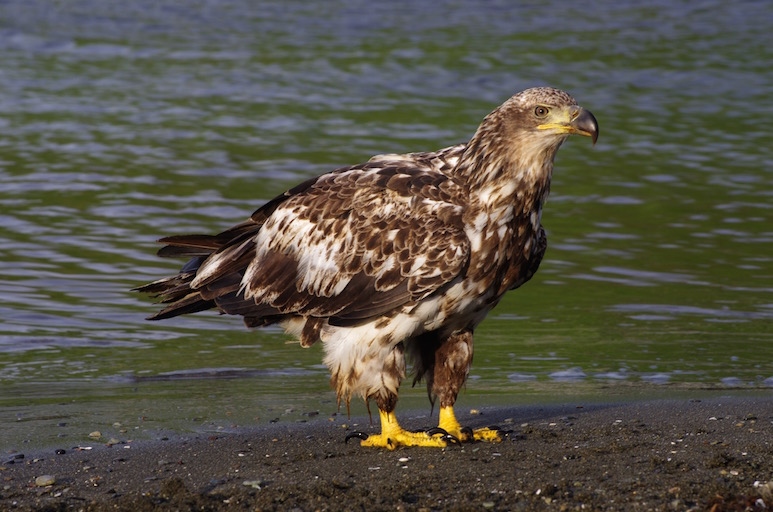

In [ ]:
import cv2
img=cv2.imread("/content/gdrive/MyDrive/MachineLearning/week1/demo_images/eagle.jpg")
cv2_imshow(img)

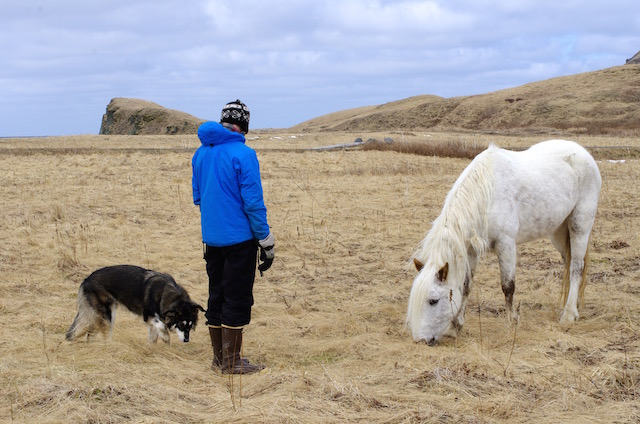

original image size: (424, 640, 3)
3
(212, 320)


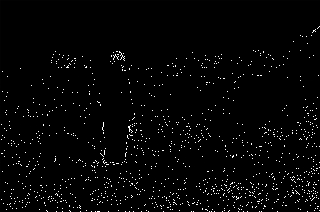

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

class MyModel(nn.Module):
    def __init__(self, kernel):
        super(MyModel, self).__init__()
        # in_channels 輸入為上一層layer的層數
        # out_channels 設定kernel的個數並產出相應個數的feature_map
        # kernel_size kernel的大小
        # stride
        # padding
        k_shape = kernel.shape[-1]
        print(k_shape)
        #self.conv1 = nn.Conv2d(in_channels=3, out_channels=1, kernel_size=k_shape, stride=1, padding=1, bias=False)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=1, kernel_size=3, stride=2, padding=1, bias=False)
        # Initialize conv1 with custom kernel
        self.conv1.weight = nn.Parameter(kernel)

    def forward(self, x):
        x = self.conv1(x)
        # pass x to other modules
        return x

img = cv2.resize(img,(512,512))

#範例

costom_kernel=[[0.,-1.,0.],
        [-1.,4.,-1.],
        [0.,-1.,0.]]

os.chdir("/content/gdrive/MyDrive/MachineLearning/week1/demo_images")
os.getcwd()
img = cv2.imread('person.jpg')
cv2_imshow(img)
print('original image size:',img.shape)

kernel = torch.tensor([[costom_kernel,
             costom_kernel,
             costom_kernel]])


model = MyModel(kernel)
x  = img.transpose(2,0,1)/255
x = torch.from_numpy(x).unsqueeze_(0).type(torch.FloatTensor)

output = model(x)
data_img = output.squeeze_().squeeze().detach().numpy()


print(data_img.shape)
cv2_imshow((data_img).astype(np.uint8))

# **BLOCK 5**

In [ ]:
import os
from PIL import Image
import torchvision as tv
from torchvision import utils
import torchvision.transforms as transforms
#from torchvision.transforms import ToPILImage
from torch.utils.data.dataset import Dataset

# 依照torch.utils.data.DataLoader的格式設定DataSet
'''
class customDataset(Dataset):
  def __init__(self):
    --------------
    -----CODE-----
    --------------

  def __getitem__(self):
    --------------
    -----CODE-----
    --------------
    return img, label

  def __len__(self):
    --------------
    -----CODE-----
    --------------
    return (the amount of Dataset)
'''


class customDataset(Dataset):
    def __init__(self, root, transform):
      self.root = root
      self.transform = transform
      #print(os.listdir(root))
      self.data = os.listdir(root)

    def __getitem__(self, idx):
      img = Image.open(os.path.join(self.root, self.data[idx]))
      img = self.transform(img)
      classes = self.data[idx].split(".")[0]

      # class : "airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"

      # modify start (依順序填寫labels 0,1,2,3,...)
      if classes == "cat":
        label = 0
      elif classes == "dog":
        label = 1
      elif classes =="airplane":
        label=2
      elif classes=="automobile":
        label=3
      elif classes=="bird":
        label=4
      elif classes=="deer":
        label=5
      elif classes=="frog":
        label=6
      elif classes=="horse":
        label=7
      elif classes=="ship":
        label=8
      else:
        label=9


      # modify end

      return img, label
    def __len__(self):
      return len(self.data)

# **BLOCK 6** 請修改類別數

      cat      deer     horse      frog


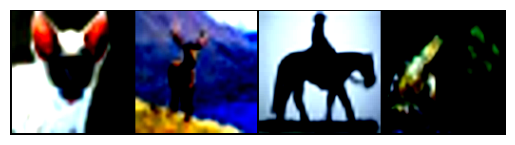

In [ ]:
# 一次輸入100張圖片至顯示卡
batch_size = 100
image_size = (128, 128)
mean = [0.485, 0.456, 0.406]
std  = [0.229, 0.224, 0.225]

# preprocessing
transform = transforms.Compose([
                # 將圖片的大小統一
                transforms.Resize(image_size, interpolation=3),   # bicubic interpolation
                # 轉換為Tensor格式
                transforms.ToTensor(),
                transforms.Normalize(mean, std)
                ])

# trainset
# 讀取cifar10的dataset
trainset = customDataset(root="/content/gdrive/MyDrive/MachineLearning/week1/DataSet/cifar10/train",transform=transform)
trainloader = torch.utils.data.DataLoader(
                      # 資料來自trainset
                      trainset,
                      # 每次取出batch_size張
                      batch_size=batch_size,
                      # 洗牌
                      shuffle=True,
                      # 多進程，增加資料匯入速度
                      num_workers=2
                      )


validset = customDataset(root="/content/gdrive/MyDrive/MachineLearning/week1/DataSet/cifar10/valid",transform=transform)
validloader = torch.utils.data.DataLoader(
                      # 資料來自validset
                      validset,
                      # 每次取出batch_size張
                      batch_size=batch_size,
                      # 洗牌
                      shuffle=True,
                      # 多進程，增加資料匯入速度
                      num_workers=2
                      )

testset = customDataset(root='/content/gdrive/MyDrive/MachineLearning/week1/DataSet/cifar10/test',transform=transform)
testloader = torch.utils.data.DataLoader(
                      # 資料來自testset
                      testset,
                      # 每次取出batch_size張
                      batch_size=4,
                      # 洗牌
                      shuffle=True,
                      # 多進程，增加資料匯入速度
                      num_workers=2
                      )



# class : "airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"

# modify start
classes = ("cat","dog","airplane","automobile","bird","deer","frog","horse","ship","truck")
# modify end


# 返回batch_size張(testloader)圖片和標籤
dataiter = next(iter(testloader))
images, labels = dataiter
print(' '.join('%9s'%classes[labels[j]] for j in range(4)))

# 顯示圖片
images = tv.utils.make_grid(images)
plt.axis("off")
plt.ioff()
plt.imshow(images.numpy().transpose(1,2,0))
plt.show()

# **BLOCK 7 請建立5層 Convolution Layers 及全連接層**


In [ ]:
import torch.nn as nn
import torch.nn.functional as F
class MyModel(nn.Module):
    # in_channals : 前一層的layer的output的out_channels大小, 若為第一層則為圖片的channals
    # out_channels : 每層計算後得到的輸出
    # kernal_size : filter size
    # stride : 步長
    # padding

    def __init__(self):
        # 此處是定義你所需的layer，並非真正執行的地方
        super(MyModel, self).__init__()

        #example
        #self.conv_xx = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        #self.relu_xx = nn.ReLU()
        #self.maxpool_xx = nn.MaxPool2d(kernel_size=2, stride=2)


        #Convolution Layer 01 start here
        self.conv_01 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.relu_01 = nn.ReLU()
        self.maxpool_01 = nn.MaxPool2d(kernel_size=2, stride=2)

        #Convolution Layer 01 end here

        #Convolution Layer 02 start here
        self.conv_02= nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu_02 = nn.ReLU()
        self.maxpool_02= nn.MaxPool2d(kernel_size=2, stride=2)
        #Convolution Layer 02 end here

        #Convolution Layer 03 start here
        self.conv_03= nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.relu_03 = nn.ReLU()
        self.maxpool_03= nn.MaxPool2d(kernel_size=2, stride=2)


        #Convolution Layer 04 start here
        self.conv_04= nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.relu_04 = nn.ReLU()
        self.maxpool_04= nn.MaxPool2d(kernel_size=2, stride=2)

        #Convolution Layer 05 start here
        self.conv_05= nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.relu_05 = nn.ReLU()
        self.maxpool_05= nn.MaxPool2d(kernel_size=2, stride=2)

        #fully connected layer start here
        self.fc1 = nn.Linear(256 * 4 * 4, 32)
        self.fc2 = nn.Linear(32,10)
        self.softmax = nn.LogSoftmax(dim=1)




    def forward(self, x):
        # 進行前向傳播
        # 真正執行的地方

        #example
        #x = self.conv_xx(x)
        #x = self.relu_xx(x)
        #x = self.maxpool_xx(x)

        #Convolution Layer 01 start here
        x=self.conv_01(x)
        x=self.relu_01(x)
        x=self.maxpool_01(x)

        #Convolution Layer 01 end here

        #Convolution Layer 02 start here
        x=self.conv_02(x)
        x=self.relu_02(x)
        x=self.maxpool_02(x)

        #Convolution Layer 02 end here

        #Convolution Layer 03 start here
        x=self.conv_03(x)
        x=self.relu_03(x)
        x=self.maxpool_03(x)

        #Convolution Layer 03 end here

        #Convolution Layer 04 start here
        x=self.conv_04(x)
        x=self.relu_04(x)
        x=self.maxpool_04(x)

        #Convolution Layer 04 end here

        #Convolution Layer 05 start here
        x=self.conv_05(x)
        x=self.relu_05(x)
        x=self.maxpool_05(x)

        #Convolution Layer 05 end here


        #fully connected layer start here
        #x = x.view(x.size(0), -1) # calucate by yourself
        x = x.view(-1,256 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        #fully connected layer end here


        return x


net = MyModel()
print(net)

MyModel(
  (conv_01): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu_01): ReLU()
  (maxpool_01): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_02): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu_02): ReLU()
  (maxpool_02): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_03): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu_03): ReLU()
  (maxpool_03): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_04): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu_04): ReLU()
  (maxpool_04): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_05): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu_05): ReLU()
  (maxpool_05): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=4096, out_f

# **BLOCK 8**

# 開始訓練

串流輸出內容已截斷至最後 5000 行。
Thu Dec  5 07:45:05 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0              33W /  70W |   2637MiB / 15360MiB |     18%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----

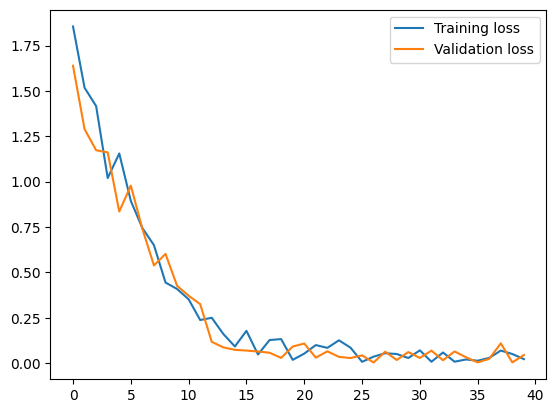

In [ ]:
from torch import optim
import numpy as np

# epochs:模型在訓練集重複訓練的總次數。一個epoch = 所有的資料量/batch_size
epochs = 40
trainloss = []
validloss = []

# 利用交叉熵loss function計算Loss
criterion = nn.CrossEntropyLoss()
# criterion = nn.NLLLoss()

# SGD-準確率梯度下降法
# lr為learning rate
# optimzier的作用就是需要根據神經網路反向傳播的梯度訊息来更新網路的參數，用以降低loss
optimizer = optim.Adam(net.parameters(), lr=0.001)


# 使用顯示卡
device = torch.device("cuda:0")

for epoch in range(epochs):

    # batch_idx為第幾個batch
    # data內含圖片以及label
    for batch_idx, data in enumerate(trainloader):
        inputs, labels = data

        # 歸零
        # optimizer.zero_grad()

        # 將data轉換成顯示卡格式並輸入顯示卡
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()

        # 將model轉換成顯示卡格式並輸入顯示卡
        net = net.to(device)

        # 將圖片輸入至model進行訓練
        outputs = net(inputs)

        # 計算loss
        loss = criterion(outputs, labels)

        # 反向傳播
        loss.backward()

        # 更新權重參數
        optimizer.step()

        # 印出訓練過程的loss
        print('Epoch {}, Batch idx {}, loss {:.7f}'.format(epoch+1, batch_idx+1, loss.item()))

        if batch_idx % 20 == 0 :
          !nvidia-smi
    trainloss.append(loss.data.cpu().numpy())

    for batch_idx, data in enumerate(validloader):
        inputs, labels = data

        # 歸零
        # optimizer.zero_grad()

        # 將data轉換成顯示卡格式並輸入顯示卡
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()

        # 將model轉換成顯示卡格式並輸入顯示卡
        net = net.to(device)

        # 將圖片輸入至model進行訓練
        outputs = net(inputs)
        # 計算loss
        loss = criterion(outputs, labels)

        # 反向傳播
        loss.backward()

        # 更新權重參數
        optimizer.step()
    validloss.append(loss.data.cpu().numpy())


print("Finish !")
plt.plot(trainloss ,label = 'Training loss')
plt.plot(validloss ,label = 'Validation loss')
plt.legend()
plt.show()

# **BLOCK 9**

# **查看結果**

### **TOP K**
輸入一張圖片，model會輸出10類個別的機率



TOP1 為10類中機率最高且正確答案的準確率


TOP2 為10類中機率前兩高且這兩個有正確答案的準確率



.
.
以此類推

In [ ]:
def evaluteTopk(model, loader, k=1):
    # 使用顯示卡
    device = torch.device("cuda:0")

    # model.eval()，使model變為測試模式
    model.eval()

    # 歸零
    total = 0
    correct = 0

    # 比對預測值與label是否正確
    for data, label in loader:
        data, label = data.to(device), label.to(device)

        # label.size = batch_size
        total = total + label.size(0)

        # 暫停更新權重，減少計算量
        with torch.no_grad():
            # 放入圖片進行預測
            model = model.to(device)
            logits = model(data)
            maxk = max((1, k))
            label_resize = label.view(-1, 1)
            # return前k大的所屬類別的機率
            _, pred = logits.topk(maxk, 1, True, True)
            pred = pred.reshape(label.size(0), k)
            correct += torch.eq(pred.to(device), label_resize.to(device)).sum().item()
    return correct / total

k = 5
topk = 100 * evaluteTopk(net, testloader, k)
print('TOP{}準確率 : {:.2f}%'.format(k, topk))

TOP5準確率 : 96.20%


# **BLOCK 10**

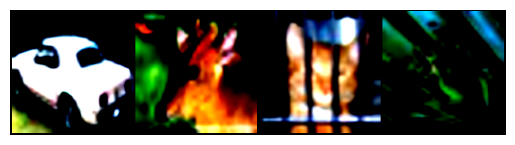

實際的label:  automobile     deer      cat     frog
預測结果:         ship     deer      dog     bird


In [ ]:
# 觀看預測結果
device = torch.device("cpu")

# 使用測試模式
net.eval()

# 載入batch_size張圖片和label
dataiter = testloader

# 將image和label分開並給予index
images, labels = next(iter(dataiter))

imgs = tv.utils.make_grid(images)
plt.axis("off")
plt.ioff()
plt.imshow(imgs.numpy().transpose(1,2,0))
plt.show()
images = images.to(device)

net = net.to(device)

# outputs回傳機率最大的類別
outputs = net(images)

print('實際的label: ', ' '.join('%08s'% classes[labels[j]] for j in range(4)))

_, predicted = torch.max(outputs.detach(), 1)
print('預測结果:    ', ' '.join('%8s'% classes[predicted[j]] for j in range(4)))

# **BLOCK 11**

In [ ]:
# 顯示圖片
# 將filter 及 Featuremap 視覺化
# nrow 每列32個圖
def visTensor(tensor, ch=3, nrow=4, padding=1):
    # n : kernal size
    # c : channal
    # w : width
    # h : height
    print(tensor.shape)
    n,c,w,h = tensor.shape
    if c != 3:
      tensor = tensor[:,ch,:,:].unsqueeze(dim=1)

    # rows 計算列數
    rows = np.min((tensor.shape[0] // nrow + 1, 32))

    # make_grid的作用是將若干張圖拼成一張圖。其中padding的作用就是子圖與子圖之間的pad有多寬。
    grid = utils.make_grid(tensor, nrow=nrow, normalize=True, padding=padding)

    # BGR 更改為 RGB
    img = grid.numpy().transpose((1, 2, 0))

    # 正規化圖片
    plt.figure(figsize=(nrow, rows))
    plt.imshow(img)

# **BLOCK 12**

# **查看feature map**

首先查看model的結構

In [ ]:
print(net)

MyModel(
  (conv_01): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu_01): ReLU()
  (maxpool_01): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_02): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu_02): ReLU()
  (maxpool_02): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_03): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu_03): ReLU()
  (maxpool_03): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_04): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu_04): ReLU()
  (maxpool_04): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_05): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu_05): ReLU()
  (maxpool_05): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=4096, out_f

# **BLOCK 13**

In [ ]:
def get_activation(name):
    def hook(net, input, output):
        activation[name] = output.detach()
    return hook

# **BLOCK 14**

實際的label:        h o r s e


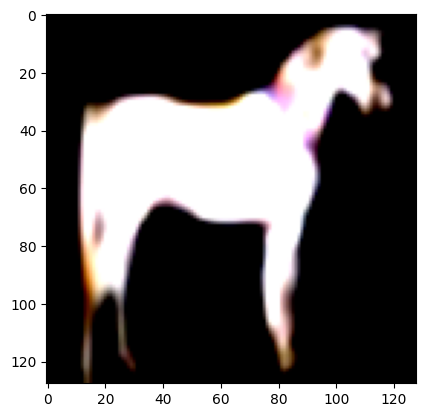

In [ ]:
# 載入原圖及標籤並顯示
idx = torch.randint(0, 4, ())
dataiter = testloader
images, labels = next(iter(dataiter))
data = images[idx]
data_img = data.detach().numpy().transpose(1, 2, 0)
plt.imshow((data_img))

print('實際的label: ', ' '.join(\
            '%08s'%classes[labels[idx]] ))
plt.show()

# **BLOCK 15**

預測结果:           h o r s e
torch.Size([32, 1, 64, 64])


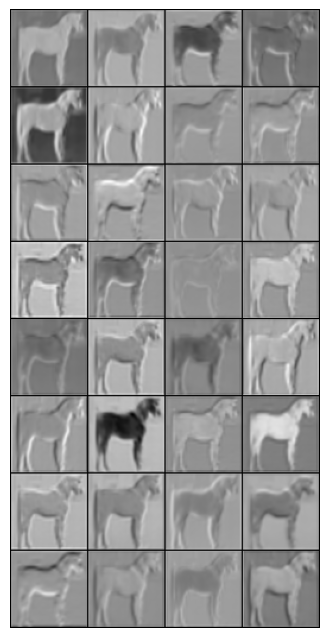

In [ ]:
# 設定查看的卷積層
net_layer_name = net.conv_02
layer_name = "conv_02"
activation = {}

#　顯示圖片需要轉換為CPU
device = torch.device("cpu")
net = net.to(device)
net.eval()

#　取得指定layer的output
# Move the hook registration before the forward pass
get_act = get_activation(layer_name)
net_layer_name.register_forward_hook(get_act)

output = net(images.to(device))  # Execute the forward pass, triggering the hook

act = activation[layer_name][idx].squeeze()
act = act.unsqueeze(dim=1)

# 預測結果
_, predicted = torch.max(output.detach(), 1)
print('預測结果:    ', ' '.join('%8s'\
            % classes[predicted[idx]] ))

#　印出圖片
visTensor(act,ch=0)
plt.axis('off')
plt.ioff()
plt.show()

# **BLOCK 16**

# **查看filter**

神經網路中經由學習不斷更新的權重，在 CNN 這邊指的就是 filter ，

例如  3X3 的 filter 內就相當於有 9 個權重。我們可以想像CNN訓練的

過程就是不斷地在改變 filter 來凸顯這個輸入圖像上的特徵。

torch.Size([32, 16, 3, 3])


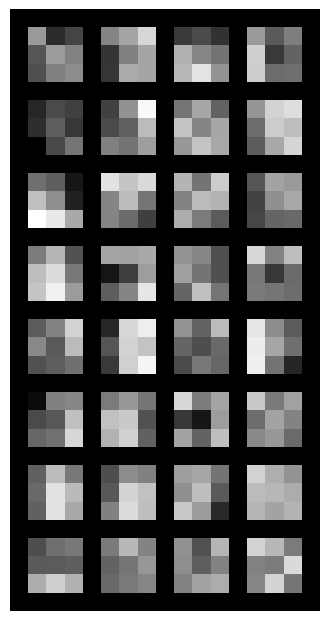

In [ ]:
net_layer_name = net.conv_02
layer_name = "conv_02"
net_filter = net_layer_name
filter = net_filter.weight.data.cpu().clone()
visTensor(filter, ch=0)

plt.axis('off')
plt.ioff()
plt.show()